In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Input text
text = """
Once upon a time, a magical golden flower grew in a hidden location. This flower had the power to heal and restore life.
An old woman named Gothel discovered it and used its magic to keep herself young for centuries. However, when the queen of a nearby kingdom fell gravely ill during pregnancy, the flower was discovered and used to heal her. The queen gave birth to a baby girl, Rapunzel, whose hair inherited the flower’s magical properties.

Desperate to regain her youth, Gothel kidnapped Rapunzel and locked her in a tall tower hidden in the forest.
Rapunzel grew up believing Gothel was her mother and that the world outside was too dangerous to explore.
She spent her days painting, reading, and brushing her 70 feet of golden hair, dreaming of the floating lanterns she saw in the sky every year on her birthday.

One day, a thief named Flynn Rider stumbled upon Rapunzel's tower while escaping the royal guards after stealing a crown.
Rapunzel captured him and struck a deal—she would return the crown if Flynn took her to see the floating lanterns.
Reluctantly, Flynn agreed, and the two embarked on an adventure filled with danger, discovery, and unexpected friendship.

Along the way, Rapunzel discovered her true identity as the lost princess and realized Gothel had lied to her.
With Flynn’s help, she returned to the kingdom and reunited with her real parents. Gothel’s evil plans were foiled, and she was defeated.

Rapunzel’s bravery and kindness brought joy back to the kingdom. She and Flynn fell in love, and they lived happily ever after, with lanterns lighting the sky on every special occasion.
"""




In [ ]:
# Clean the text
cleaned_text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove numbers
cleaned_text = cleaned_text.lower()  # Convert to lowercase

# Tokenizing the text
stopWords = set(stopwords.words("english"))
words = word_tokenize(cleaned_text)



In [ ]:
# Frequency Table
freqTable = dict()
for word in words:
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

# Sentence Tokenization
sentences = sent_tokenize(cleaned_text)
sentenceValue = dict()
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq



In [ ]:
sumValues = 0
for sentence in sentenceValue:
	sumValues += sentenceValue[sentence]
# Average value of a sentence from the original text

average = int(sumValues / len(sentenceValue))

# Storing sentences into our summary.
summary = ''
for sentence in sentences:
	if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2* average)):
		summary += " " + sentence


print(summary)


In [ ]:
# EDA: Word and sentence count
print(f"Total words: {len(words)}")
print(f"Total sentences: {len(sentences)}")
print(f"Unique words: {len(set(words))}")

# Most common words
most_common_words = Counter(freqTable).most_common(10)
print("Most common words:", most_common_words)



Total words: 273
Total sentences: 1
Unique words: 159
Most common words: [('rapunzel', 5), ('gothel', 4), ('flynn', 4), ('flower', 3), ('discovered', 3), ('kingdom', 3), ('lanterns', 3), ('upon', 2), ('magical', 2), ('golden', 2)]


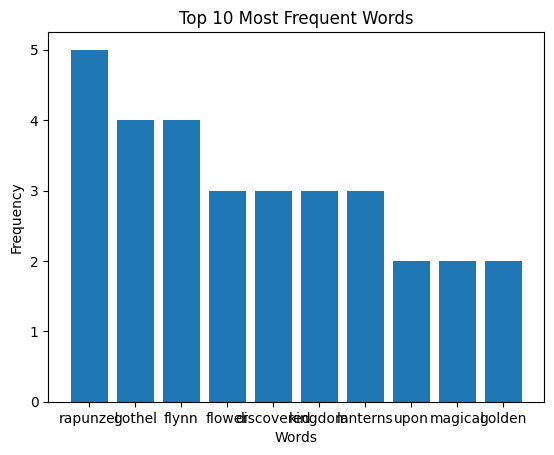

In [ ]:
# Visualization of word frequencies
word_labels, word_counts = zip(*most_common_words)
plt.bar(word_labels, word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()



In [ ]:
# ---- TF-IDF Embedding ----
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sentences)




In [ ]:
# Tokenize sentences for Word2Vec
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train a Word2Vec model on the corpus (skip-gram method)
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)


# ---- Train Model using Word2Vec ----
word_vectors = np.array([word2vec_model.wv[word] for word in words if word in word2vec_model.wv])



In [ ]:
# Simple Logistic Regression for classification
# Change the target variable list to iterate over 'words' instead of 'sentence'
# Instead of checking for 'princess', we will check if the word is in the most_common_words
X_train, X_test, y_train, y_test = train_test_split(
    word_vectors,
    [1 if word in [w for w, c in most_common_words] else 0 for word in words if word in word2vec_model.wv],
    test_size=0.2,
    random_state=42
)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8909090909090909
Precision: 0.7937190082644628
Recall: 0.8909090909090909
F1-Score: 0.8395104895104895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
